In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
import functions as fn

In [2]:
path_test = "../PANOCOS2"
path_results = "../results_images"
cameras = 4
cam_width = 1280
cam_hight = 1024
cameras_name = {"0":"0", "1":"1", "2":"1", "3":"0"}
num_image = 10

images=[]
for cam in range(cameras):
    images.append(cv.imread(path_test + "/camera_" + str(cam) + "/camera_" + cameras_name[str(cam)]+ "_image_%06d"% num_image + ".bmp", 0))

In [3]:
# find coordinates and transformation
cam_coord = np.zeros((cameras, 4), dtype=np.int32)
G_list = []

In [4]:
cam = 0
G_list.append(np.array([[1., 0., 0.],[0., 1., 0.]]))
cam_coord[cam][2:] = images[cam].shape[:2][::-1]

for cam in range(1, cameras):
    H = fn.homografy(images[cam-1], images[cam])
    G, dim = fn.rotate_and_cut(images[cam], H)
    images[cam] = cv.warpAffine(images[cam], G, dim)
    G_list.append(G)

    cam_coord[cam][ :2] = cam_coord[cam-1][:2] + H[:,2] - G[:,2]
    cam_coord[cam][2:] = images[cam].shape[:2][::-1]
cam_coord

array([[   0,    0, 1280, 1024],
       [1135,  183, 1268, 1011],
       [2213,  238, 1225,  962],
       [2912,  125, 1200,  940]], dtype=int32)

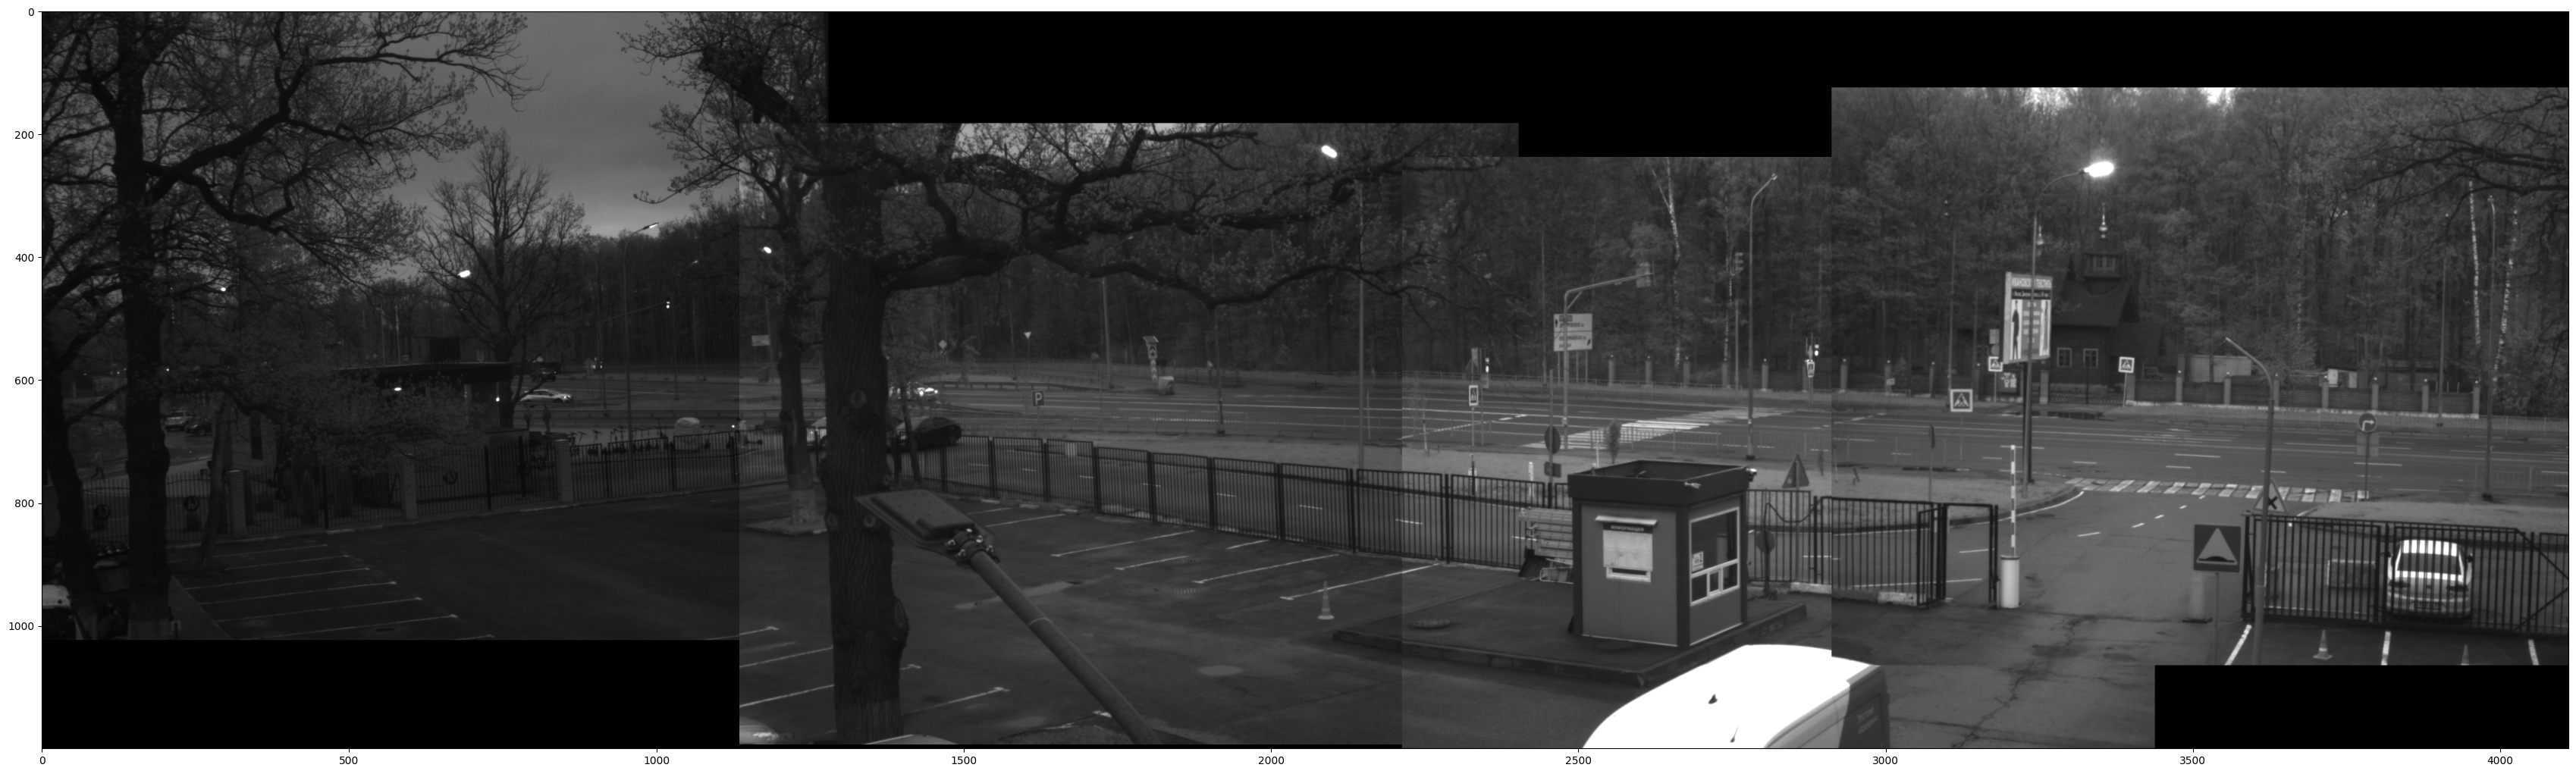

In [5]:
display = fn.stich_images(cam_coord, images, defolt_color = 0)
fn.im_show(display, gray='gray')

In [6]:
##### counting weights

W_list = [0, 0, 0, 0]

In [7]:
for cam in range(1, cameras):
    W_list[cam] = fn.return_W(cam - 1, cam, cam_coord)

In [8]:
num_image = 100
images = [0, 0, 0, 0]

In [9]:
for cam in range(cameras):
    im = cv.imread(path_test + "/camera_" + str(cam) + "/camera_" + cameras_name[str(cam)]+ "_image_%06d"% num_image + ".bmp", 0)
    images[cam] = cv.warpAffine(im, G_list[cam], (cam_coord[cam][2], cam_coord[cam][3]))
    
display1 = fn.stich_images(cam_coord, images, defolt_color = 0)

In [10]:
### brightness correction
images = [0, 0, 0, 0]
cam1 = 0
images[cam1] = cv.imread(path_test + "/camera_" + str(cam1) + "/camera_" + cameras_name[str(cam1)]+ "_image_%06d"% num_image + ".bmp", 0)

for cam2 in range(1, cameras):
    cam1 = cam2 - 1
    im1 = images[cam1]
    im2 = cv.imread(path_test + "/camera_" + str(cam2) + "/camera_" + cameras_name[str(cam2)]+ "_image_%06d"% num_image + ".bmp", 0)
    im2 = cv.warpAffine(im2, G_list[cam2], (cam_coord[cam2][2], cam_coord[cam2][3]))
    
    images[cam2] = fn.brightness_correction(im1, im2, cam1, cam2, cam_coord, W_list)

display2 = fn.stich_images(cam_coord, images, defolt_color = 0)
    

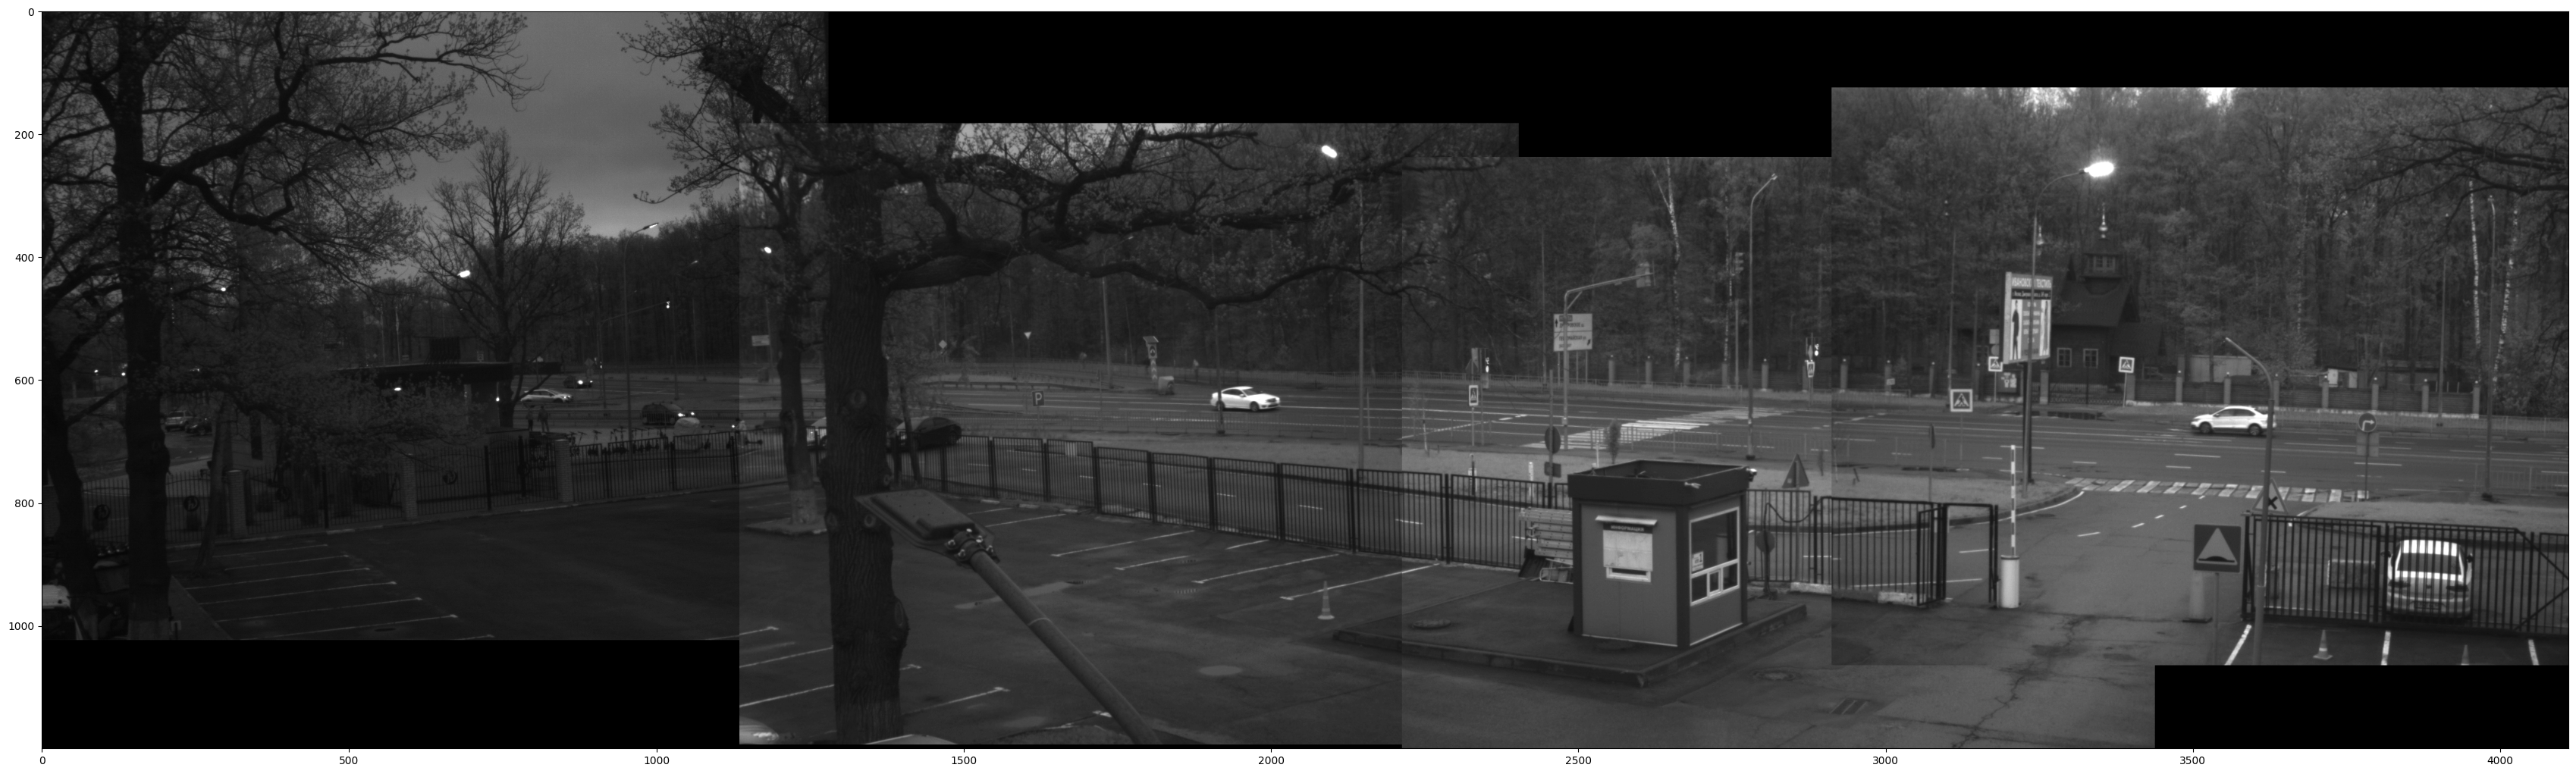

In [11]:
### original
fn.im_show(display1, gray='gray')

In [12]:
cv.imwrite(path_results + "/original.jpg", display1)

True

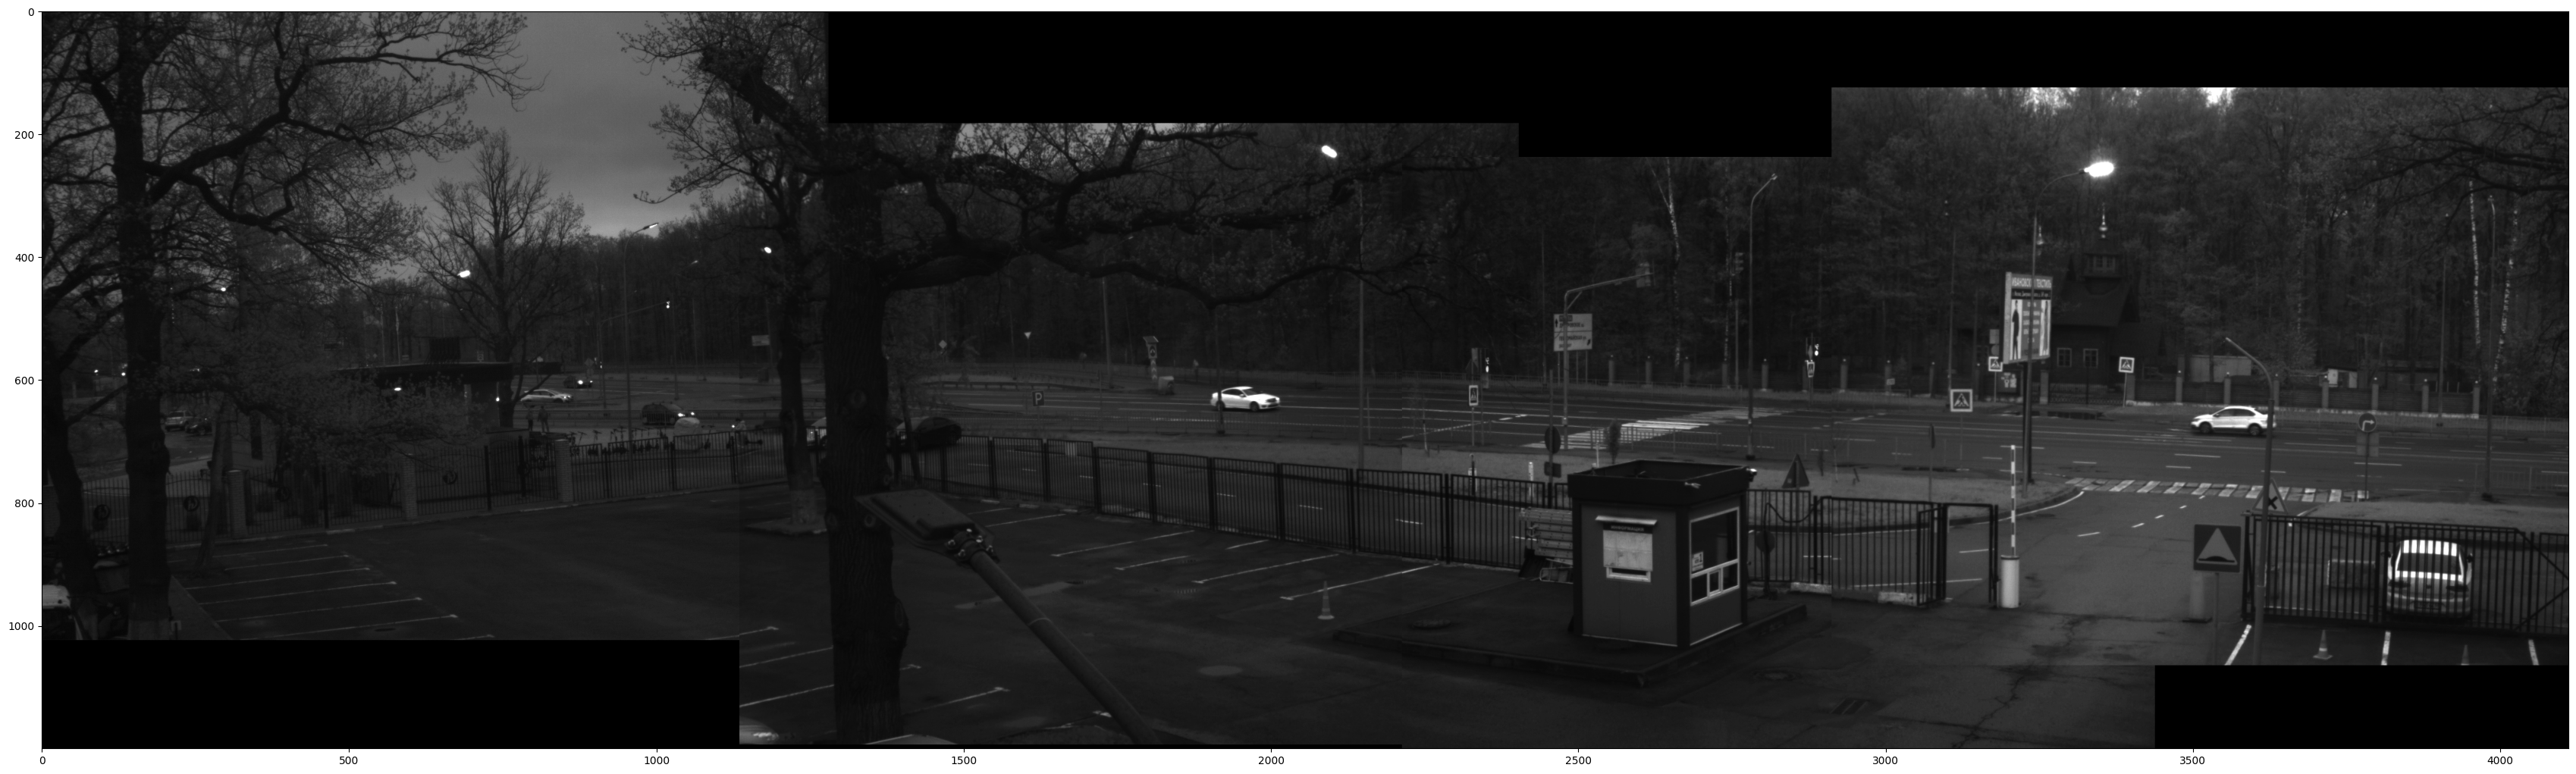

In [13]:
### corrected
fn.im_show(display2, gray='gray')

In [14]:
cv.imwrite(path_results + "/brightness_correction.jpg", display2)

True